<a href="https://colab.research.google.com/github/javier-jaime/Stock_Price_Forecasting/blob/main/Financial_Data_from_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the necessary Libraries

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'
from google.colab import files

     |████████████████████████████████| 6.4 MB 12.7 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Importing the Datasets

In [22]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
period = input('Enter the period (1y,2y,3y...max): ')
print(f'You entered {stock} and period {period}')

ticker = yf.Ticker(stock)

Enter the stock ticker: TSLA
Enter the period (1y,2y,3y...max): 1y
You entered TSLA and period 1y


In [3]:
# get stock info
print(f'This is the info available from {stock}:\n')
print(ticker.info)

# get historical market data
print('\n This is the historical market data from the last 10 days:\n')
hist = ticker.history(period)
print(hist.tail(10))

# show actions (dividends, splits)
# ticker.actions

# show dividends if any
# ticker.dividends

# show splits if any
# ticker.splits

# show major holders
print('\n These are the Major holders:\n')
print(ticker.major_holders)

# show institutional holders
print('\n These are the institutional holders:\n')
print(ticker.institutional_holders)

# show earnings
print('\n These are the Annual Earnings:\n')
print(ticker.earnings)
print('\n These are the Quarterly Earnings:\n')
print(ticker.quarterly_earnings)

# show sustainability
print('\n This is the Reported Sustainability:\n')
print(ticker.sustainability)

# show analysts recommendations
# ticker.recommendations

# show next event (earnings, etc)
# ticker.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
print('\n ISIN:',ticker.isin)

# show options expirations
# ticker.options

# show news
# ticker.news

# get option chain for specific expiration
# opt = ticker.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

This is the info available from TSLA:

{'zip': '78725', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 99290, 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service techni

In [4]:
# show financials
print('\n These are the Annual Income Statements:\n')
print(ticker.financials)
print('\n These are the Quarterly Income Statements:\n')
print(ticker.quarterly_financials)

# show balance sheet
print('\n This is the Annual Balance Sheet:\n')
print(ticker.balance_sheet)
print('\n This is the Quarterly Balance Sheet:\n')
print(ticker.quarterly_balance_sheet)

# show cashflow
print('\n This is the Annual Cashflow:\n')
print(ticker.cashflow)
print('\n This is the Quarterly Cashflow:\n')
print(ticker.quarterly_cashflow)


 These are the Annual Income Statements:

                                           2021-12-31     2020-12-31  \
Research Development                     2593000000.0   1491000000.0   
Effect Of Accounting Charges                     None           None   
Income Before Tax                        6343000000.0   1154000000.0   
Minority Interest                        1394000000.0   1454000000.0   
Net Income                               5519000000.0    721000000.0   
Selling General Administrative           4517000000.0   3188000000.0   
Gross Profit                            13606000000.0   6630000000.0   
Ebit                                     6523000000.0   1951000000.0   
Operating Income                         6523000000.0   1951000000.0   
Other Operating Expenses                  -27000000.0    -27000000.0   
Interest Expense                         -358000000.0   -784000000.0   
Extraordinary Items                              None           None   
Non Recurring        

In [5]:
# Fill Empty/NA cells with zeros, transpose it and rename index
financials = ticker.financials.fillna(0).transpose()
financials.index.rename('Date', inplace=True)
financials = financials.assign(**{'symbol': stock})

balancesheet = ticker.balance_sheet.fillna(0).transpose()
balancesheet.index.rename('Date', inplace=True)
balancesheet = balancesheet.assign(**{'symbol': stock})

cashflow = ticker.cashflow.fillna(0).transpose()
cashflow.index.rename('Date', inplace=True)
cashflow = cashflow.assign(**{'symbol': stock})

info = pd.DataFrame.from_dict(ticker.info, orient ='index').transpose()
info.set_index('symbol', inplace=True)

In [6]:
# Download Financial CSV Files
financials.to_csv(f'{stock}_income_statement.csv')
files.download(f'{stock}_income_statement.csv')
balancesheet.to_csv(f'{stock}_balance_sheet.csv')
files.download(f'{stock}_balance_sheet.csv')
cashflow.to_csv(f'{stock}_cashflow.csv')
files.download(f'{stock}_cashflow.csv')
info.to_csv(f'{stock}_info.csv')
files.download(f'{stock}_info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Multiple Tickers Data Test
TickersData = yf.download(
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",
        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5d",
        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",
        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',
        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,
        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,
        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,
        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
TickersData.head()

[*********************100%***********************]  3 of 3 completed


SPY                                   MSFT  \
                             Open    High     Low   Close Volume    Open   
Datetime                                                                   
2022-05-02 04:00:00-04:00  413.00  414.00  412.69  413.51    0.0  278.18   
2022-05-02 04:01:00-04:00  413.42  413.83  413.42  413.83    0.0  278.30   
2022-05-02 04:02:00-04:00  414.10  414.10  413.83  413.93    0.0  278.99   
2022-05-02 04:03:00-04:00  413.80  414.14  413.80  414.14    0.0  278.79   
2022-05-02 04:04:00-04:00  414.00  414.14  413.87  414.00    0.0     NaN   

                                                            AAPL          \
                             High     Low   Close Volume    Open    High   
Datetime                                                                   
2022-05-02 04:00:00-04:00  280.00  278.18  278.95    0.0  157.99  160.00   
2022-05-02 04:01:00-04:00  278.99  278.11  278.99    0.0  158.40  158.69   
2022-05-02 04:02:00-04:00  278.99  278.70  278.72    0.0  158.54  158.69   
2022-05-02 04:03:00-04:00  279.00  278.70  279.00    0.0  158.69  158.73   
2022-05-02 04:04:00-04:00     NaN     NaN     NaN    NaN  158.54  158.69   

                                                  
                              Low   Close Volume  
Datetime                                          
2022-05-02 04:00:00-04:00  157.93  158.57    0.0  
2022-05-02 04:01:00-04:00  158.22  158.61    0.0  
2022-05-02 04:02:00-04:00  158.52  158.63    0.0  
2022-05-02 04:03:00-04:00  158.52  158.66    0.0  
2022-05-02 04:04:00-04:00  158.54  158.57    0.0

# Data Visualization (plotly express) - Visualizing the historical performance

In [25]:
data = hist.reset_index()

In [26]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [27]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [28]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

In [29]:
# Hurst Exponent >0.5 expanding, 0.5 random walking, <0.5 mean reverting (Lags in Days)
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]
  
hurst = pd.DataFrame(columns =["hurst_exp","lag"])
lags = range(4, 121, 2)
for lag in lags:
    hurst_exp = get_hurst_exponent(data["Close"].values, lag)
    hurst = hurst.append({"hurst_exp":hurst_exp,"lag":lag},ignore_index=True)
px.line(hurst, x="hurst_exp", y="lag", title=f'{stock} Hurst Exp')

## Data Preparation for Facebook Prophet

In [30]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
2981,2022-05-02,902.940002
2982,2022-05-03,909.250000
2983,2022-05-04,952.619995
2984,2022-05-05,873.280029
2985,2022-05-06,875.455994


## Creating Facebook Prophet Model

In [31]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [32]:
periods = 30
future=m.make_future_dataframe(periods)

In [33]:
forecast=m.predict(future)

In [34]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,1.830049,-74.112747,53.989747,1.830049,1.830049,-11.522372,-11.522372,-11.522372,-0.206183,-0.206183,-0.206183,-11.316190,-11.316190,-11.316190,0.0,0.0,0.0,-9.692323
1,2010-06-30,1.839999,-71.696408,54.913880,1.839999,1.839999,-10.851024,-10.851024,-10.851024,-0.106972,-0.106972,-0.106972,-10.744053,-10.744053,-10.744053,0.0,0.0,0.0,-9.011025
2,2010-07-01,1.849949,-71.902653,53.153286,1.849949,1.849949,-11.228955,-11.228955,-11.228955,-1.039816,-1.039816,-1.039816,-10.189139,-10.189139,-10.189139,0.0,0.0,0.0,-9.379006
3,2010-07-02,1.859900,-74.458056,58.281385,1.859900,1.859900,-11.551530,-11.551530,-11.551530,-1.890987,-1.890987,-1.890987,-9.660543,-9.660543,-9.660543,0.0,0.0,0.0,-9.691630
4,2010-07-06,1.899700,-70.835005,62.032809,1.899700,1.899700,-8.178510,-8.178510,-8.178510,-0.206183,-0.206183,-0.206183,-7.972327,-7.972327,-7.972327,0.0,0.0,0.0,-6.278810
5,2010-07-07,1.909650,-73.119213,61.450829,1.909650,1.909650,-7.796890,-7.796890,-7.796890,-0.106972,-0.106972,-0.106972,-7.689918,-7.689918,-7.689918,0.0,0.0,0.0,-5.887240
6,2010-07-08,1.919601,-72.929665,56.796823,1.919601,1.919601,-8.512359,-8.512359,-8.512359,-1.039816,-1.039816,-1.039816,-7.472544,-7.472544,-7.472544,0.0,0.0,0.0,-6.592759
7,2010-07-09,1.929551,-69.368702,50.410867,1.929551,1.929551,-9.213363,-9.213363,-9.213363,-1.890987,-1.890987,-1.890987,-7.322375,-7.322375,-7.322375,0.0,0.0,0.0,-7.283812
8,2010-07-12,1.959401,-70.994983,59.242304,1.959401,1.959401,-6.975399,-6.975399,-6.975399,0.298509,0.298509,0.298509,-7.273908,-7.273908,-7.273908,0.0,0.0,0.0,-5.015998
9,2010-07-13,1.969352,-66.216255,58.782424,1.969352,1.969352,-7.589891,-7.589891,-7.589891,-0.206183,-0.206183,-0.206183,-7.383709,-7.383709,-7.383709,0.0,0.0,0.0,-5.620540


In [35]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

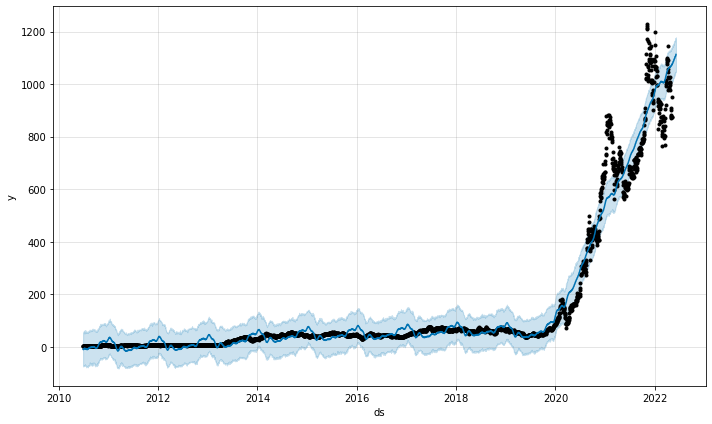

In [36]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

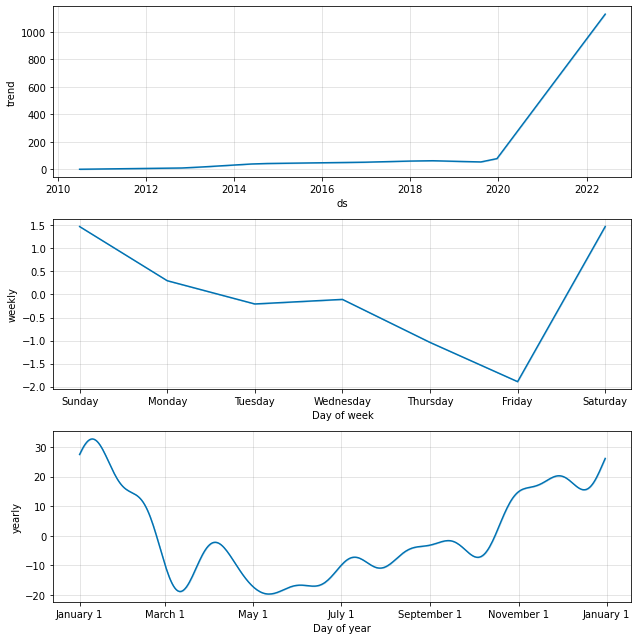

In [37]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [21]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>